# Cancer Type Classification

This notebook implements a comprehensive workflow for cancer type classification using pathology images.

Author: [Your Name]  
Date: [Current Date]

## 1. Setup and Imports

In [101]:
# Standard imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from tqdm.notebook import tqdm
import random
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

## 2. Data Understanding

In this section, we'll explore the cancer type dataset to understand its structure, content, and characteristics.

In [102]:
# Import data understanding module
from data_understanding import (
    load_data, merge_datasets, explore_data_types, 
    analyze_cancer_types, analyze_histology_subtypes,
    analyze_image_data, analyze_clinical_data, prepare_data_for_modeling
)

In [103]:
# Load data
clinical, pathology = load_data()
if clinical is None or pathology is None:
    print("Error: Could not load datasets. Exiting.")

Loading datasets...
Successfully loaded datasets:
  - Clinical data: 2150 rows, 48 columns
  - Pathology data: 1252 rows, 279 columns


In [104]:
# Explore data types and missing values
clinical_summary = explore_data_types(clinical, "Clinical")
pathology_summary = explore_data_types(pathology, "Pathology")


Clinical Data Types and Missing Values:
                 Data Type  Missing Values  Missing Percent
valcsg             float64             788        36.651163
path_n_7thed       float64             684        31.813953
path_t_7thed       float64             682        31.720930
path_m_7thed       float64             682        31.720930
path_n             float64             655        30.465116
path_m             float64             651        30.279070
path_t             float64             634        29.488372
path_stag          float64             629        29.255814
stage_sum          float64             629        29.255814
stage_only         float64             566        26.325581
topog_source       float64             293        13.627907
lesionsize         float64             273        12.697674
clinical_t_7thed   float64             106         4.930233
clinical_n_7thed   float64              78         3.627907
clinical_m_7thed   float64              78         3.627907

In [105]:
# Merge datasets
merged_df = merge_datasets(clinical, pathology)


Merging datasets on patient ID (pid)...
Clinical dataset has 2058 unique patients
Pathology dataset has 452 unique patients
Datasets have 452 patients in common
Merged dataset has 1351 rows and 326 columns



Analyzing Cancer Types:
Distribution of Cancer Types:
cancer_type
Adenocarcinoma                          518
Squamous Cell Carcinoma                 298
Neuroendocrine Carcinoma                132
Bronchioloalveolar Carcinoma            127
Large Cell Carcinoma, NOS                34
Small Cell Carcinoma                     33
Keratinizing Squamous Cell Carcinoma     32
Large Cell Neuroendocrine Carcinoma      31
Lepidic Predominant Adenocarcinoma       24
Adenosquamous Carcinoma                  15
Name: count, dtype: int64

Distribution of Major Cancer Categories:
major_category
Adenocarcinoma              730
Squamous Cell Carcinoma     336
Neuroendocrine Carcinoma    221
Large Cell Carcinoma         34
Other                        30
Name: count, dtype: int64


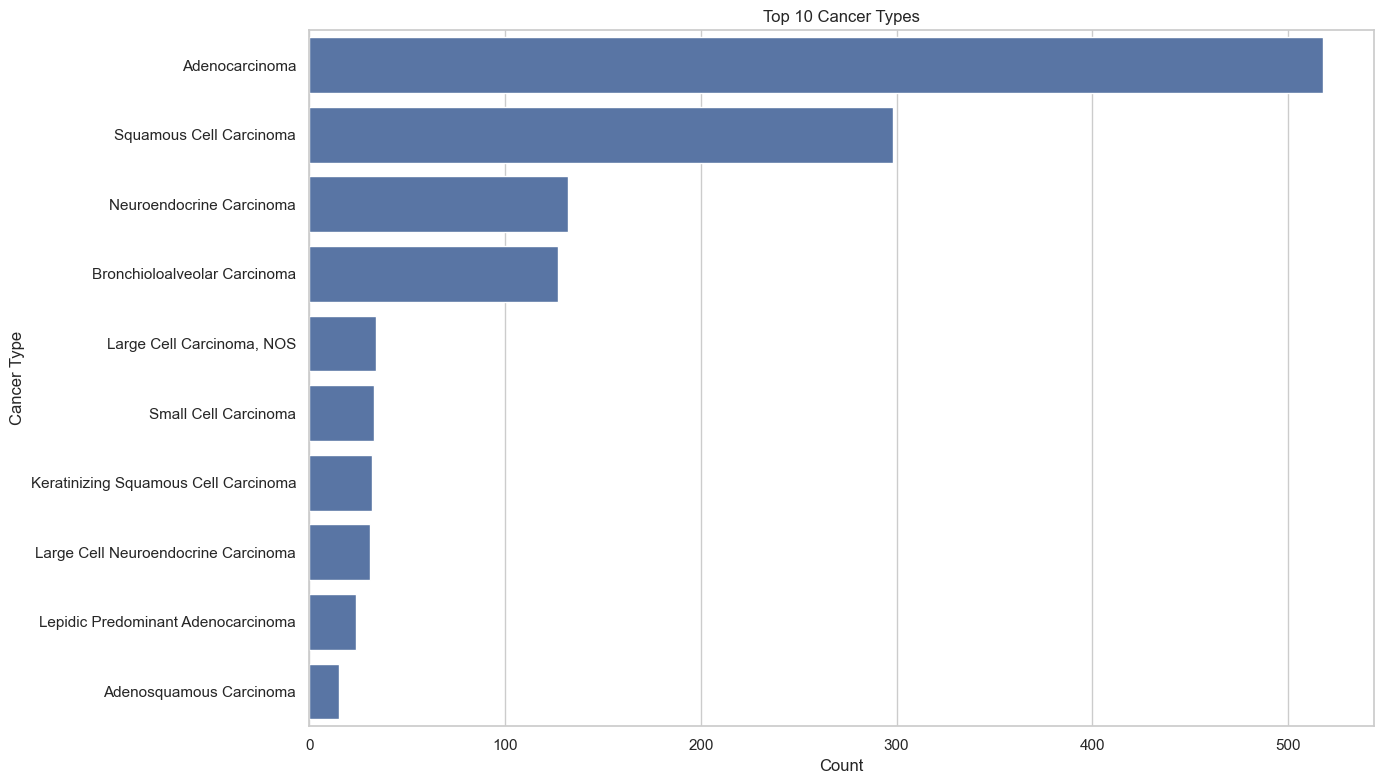

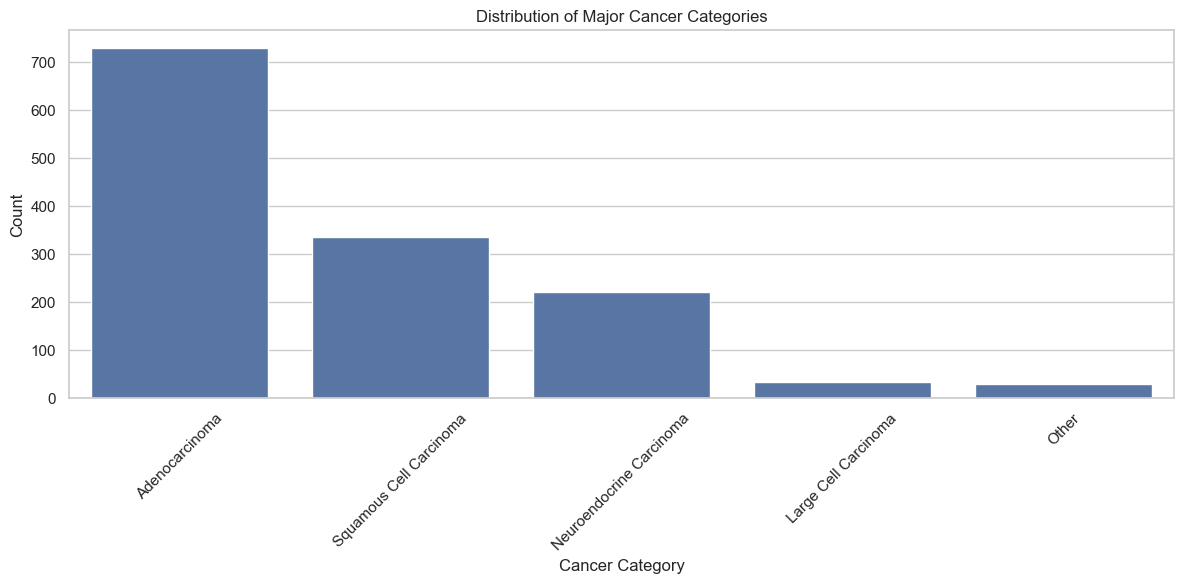

In [106]:
# Analyze cancer types
merged_df = analyze_cancer_types(merged_df)


Analyzing Histology Subtypes from ROI data:
Number of non-null values in each histology subtype column:
  - roi_histology_subtype1: 1305
  - roi_histology_subtype2: 941
  - roi_histology_subtype3: 411
  - roi_histology_subtype4: 107
  - roi_histology_subtype5: 9
  - roi_histology_subtype6: 2

Most common histology subtypes in first ROI:
roi_histology_subtype1
Non-Tumor Lung                         395
Squamous Cell Carcinoma                216
Acinar Adenocarcinoma                  204
Large Cell Carcinoma                    64
BAC Nonmucinous                         57
Papillary Adenocarcinoma                54
Adenocarcinoma, Mixed Subtype           49
Adenocarcinoma, NOS                     38
Large Cell Neuroendocrine Carcinoma     30
Squamous Cell Carcinoma, Basaloid       30
Name: count, dtype: int64


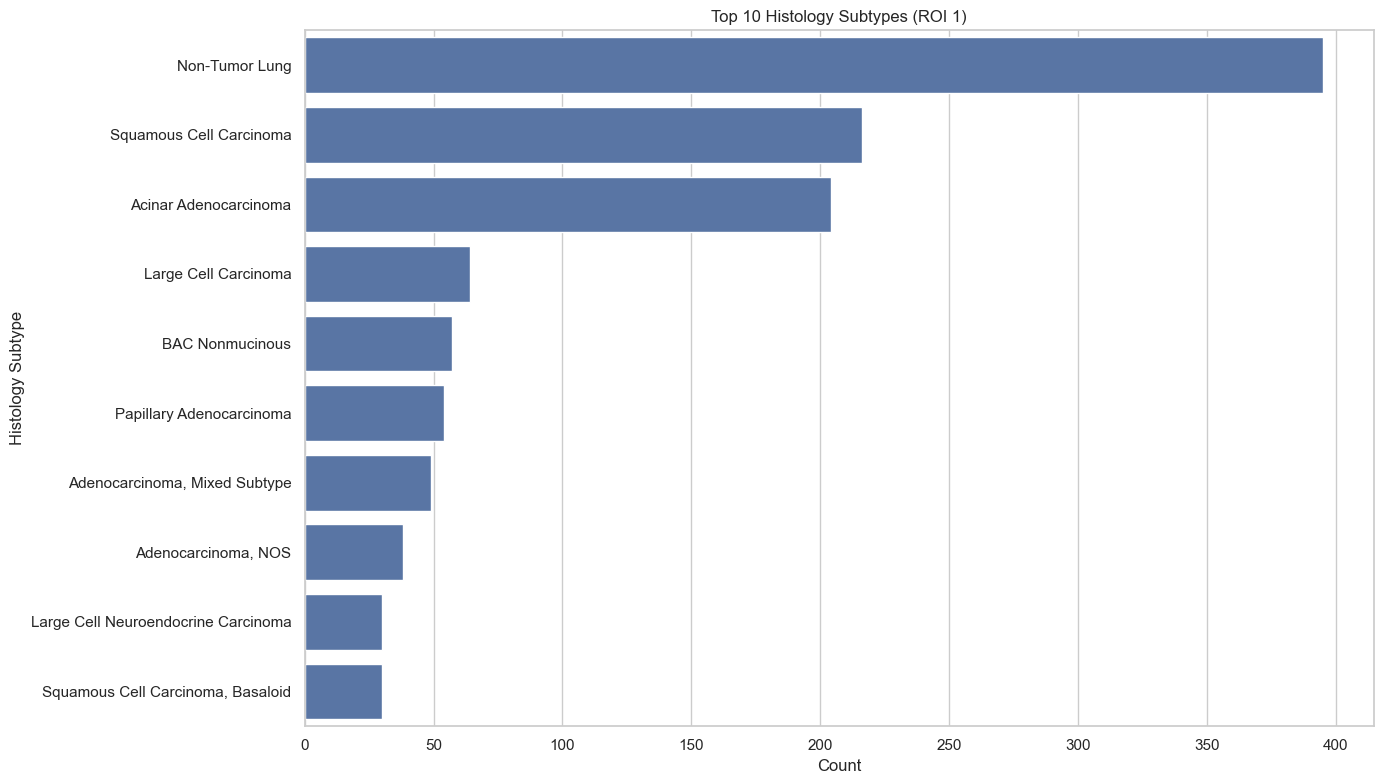

In [107]:
# Analyze histology subtypes
subtype_dist = analyze_histology_subtypes(merged_df)


Analyzing Image Data:
Image filename examples:
0          11445.svs
1          11446.svs
2          11447.svs
3    NLSI0000526.svs
4           9485.svs
Name: image_filename, dtype: object

Image file size statistics (MB):
  - Min: 0.01
  - Max: 1.95
  - Mean: 0.65
  - Median: 0.59

Image directory not found: ../Data/type/Pathology Images/images


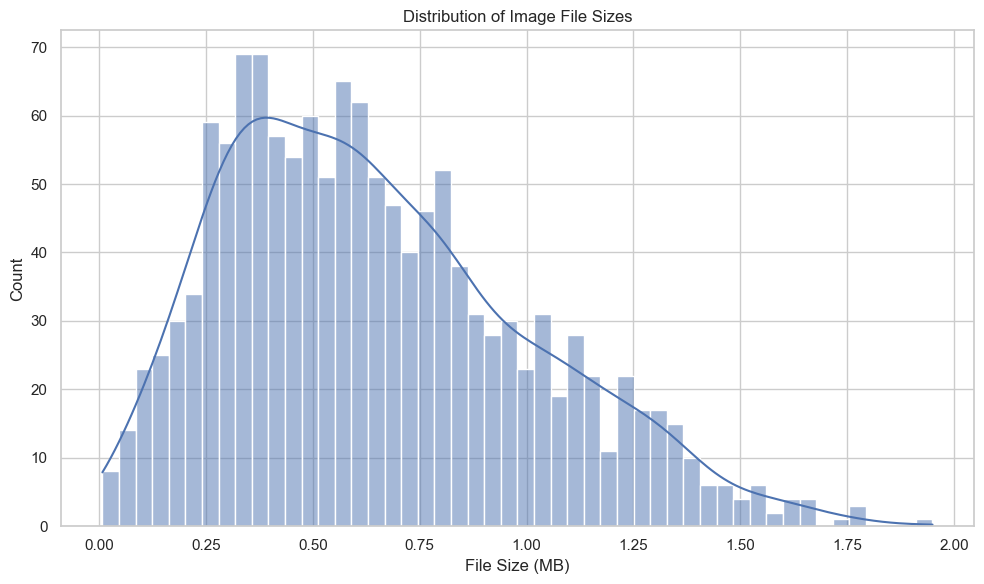

In [108]:
# Analyze image data
merged_df = analyze_image_data(merged_df)


Analyzing Clinical Data:

Distribution of clinical_stag:
clinical_stag
110.0    779
120.0    151
310.0    107
999.0     83
320.0     57
400.0     39
210.0     33
220.0     30
994.0     12
888.0      6
Name: count, dtype: int64

Distribution of de_stag:
de_stag
110.0    695
120.0    221
310.0    117
210.0     84
320.0     83
220.0     79
400.0     58
994.0     12
888.0      1
Name: count, dtype: int64

Distribution of de_stag_7thed:
de_stag_7thed
110.0    711
120.0    180
310.0    168
210.0    141
220.0     76
400.0     49
320.0     13
Name: count, dtype: int64

Distribution of path_stag:
path_stag
110.0    617
120.0    212
999.0     91
310.0     87
210.0     83
220.0     72
320.0     64
400.0     38
994.0     12
900.0      9
Name: count, dtype: int64

Distribution of source_best_stage:
source_best_stage
1     1160
3       81
2       59
5       37
94      12
99       1
98       1
Name: count, dtype: int64

Distribution of stage_only:
stage_only
110.0    133
310.0     53
120.0     47
32

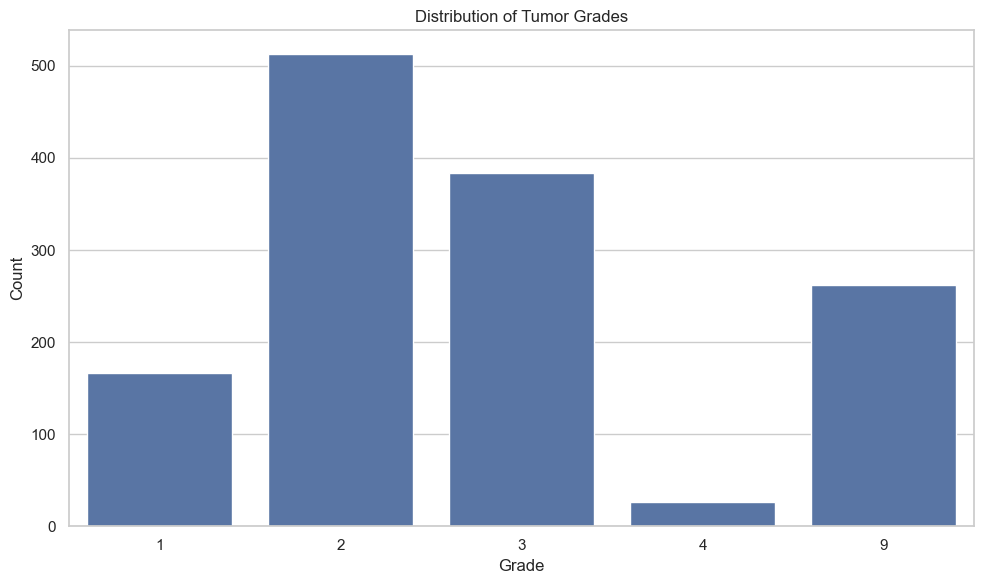

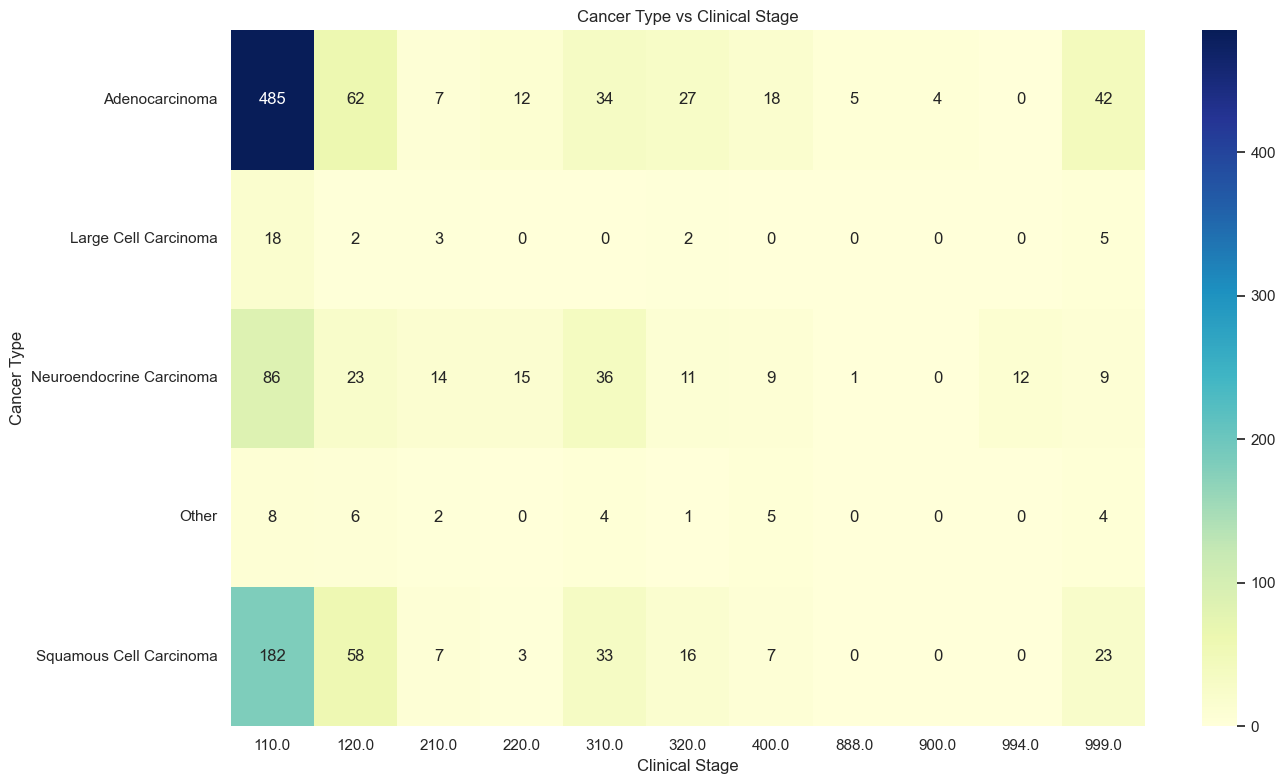

In [109]:
# Analyze clinical data
merged_df = analyze_clinical_data(merged_df)

In [110]:
# Prepare data for modeling
modeling_df = prepare_data_for_modeling(merged_df)


Preparing Data for Modeling:
Column clinical_stag has 50 missing values (3.70%)
Column clinical_t has 62 missing values (4.59%)
Column clinical_n has 57 missing values (4.22%)
Column clinical_m has 58 missing values (4.29%)
Column roi_histology_subtype1 has 46 missing values (3.40%)
Column block_worst_grade has 46 missing values (3.40%)
After dropping rows with missing values in key columns: 1351 rows
Saved prepared dataset to 'cancer_type_modeling_data.csv'


## 3. Data Visualization

In this section, we'll visualize the cancer type data to better understand its characteristics.

In [111]:
# Import visualization module
from visualization import (
    visualize_cancer_distribution, visualize_feature_correlation,
    visualize_pathology_image, visualize_image_grid,
    visualize_augmentation_examples, visualize_class_examples,
    visualize_tsne_embedding, visualize_image_with_overlay,
    visualize_roi_extraction, visualize_augmentation_comparison,
    visualize_preprocessing_steps, visualize_class_balance,
    visualize_image_statistics
)

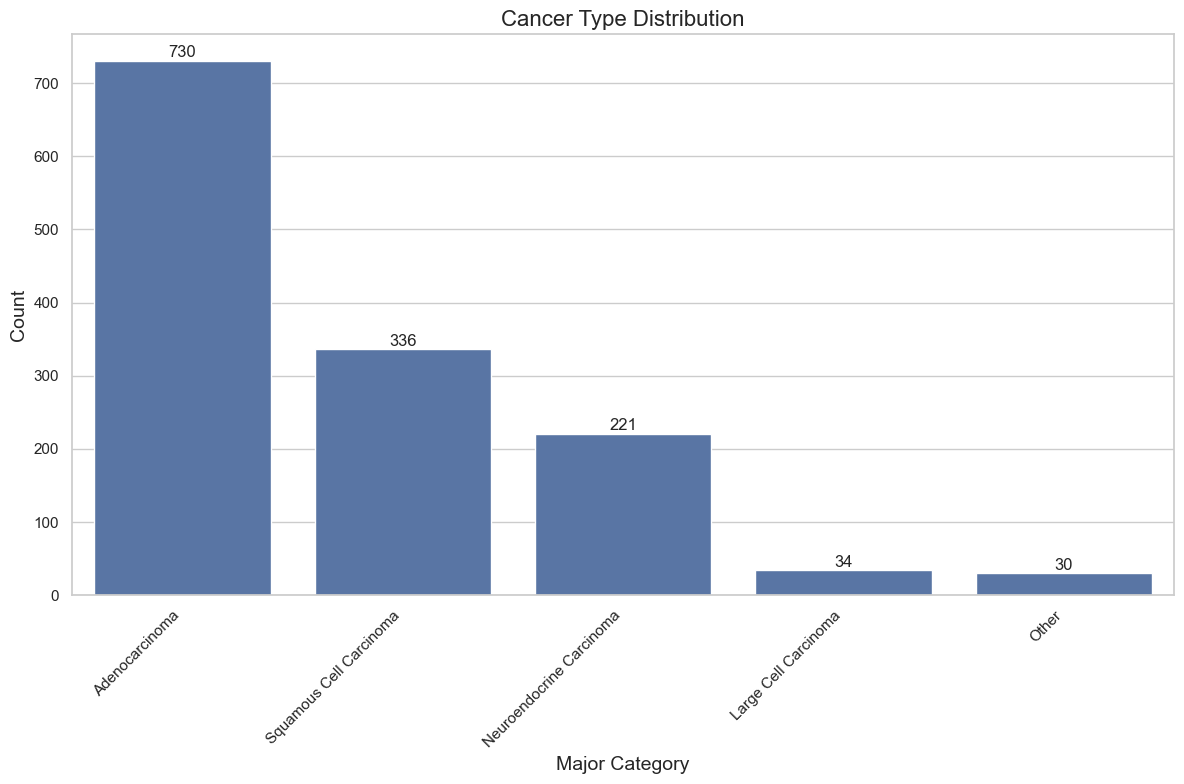

In [112]:
# Visualize cancer type distribution
visualize_cancer_distribution(merged_df, column='major_category', 
                             title='Cancer Type Distribution',
                             save_path='cancer_distribution.png')

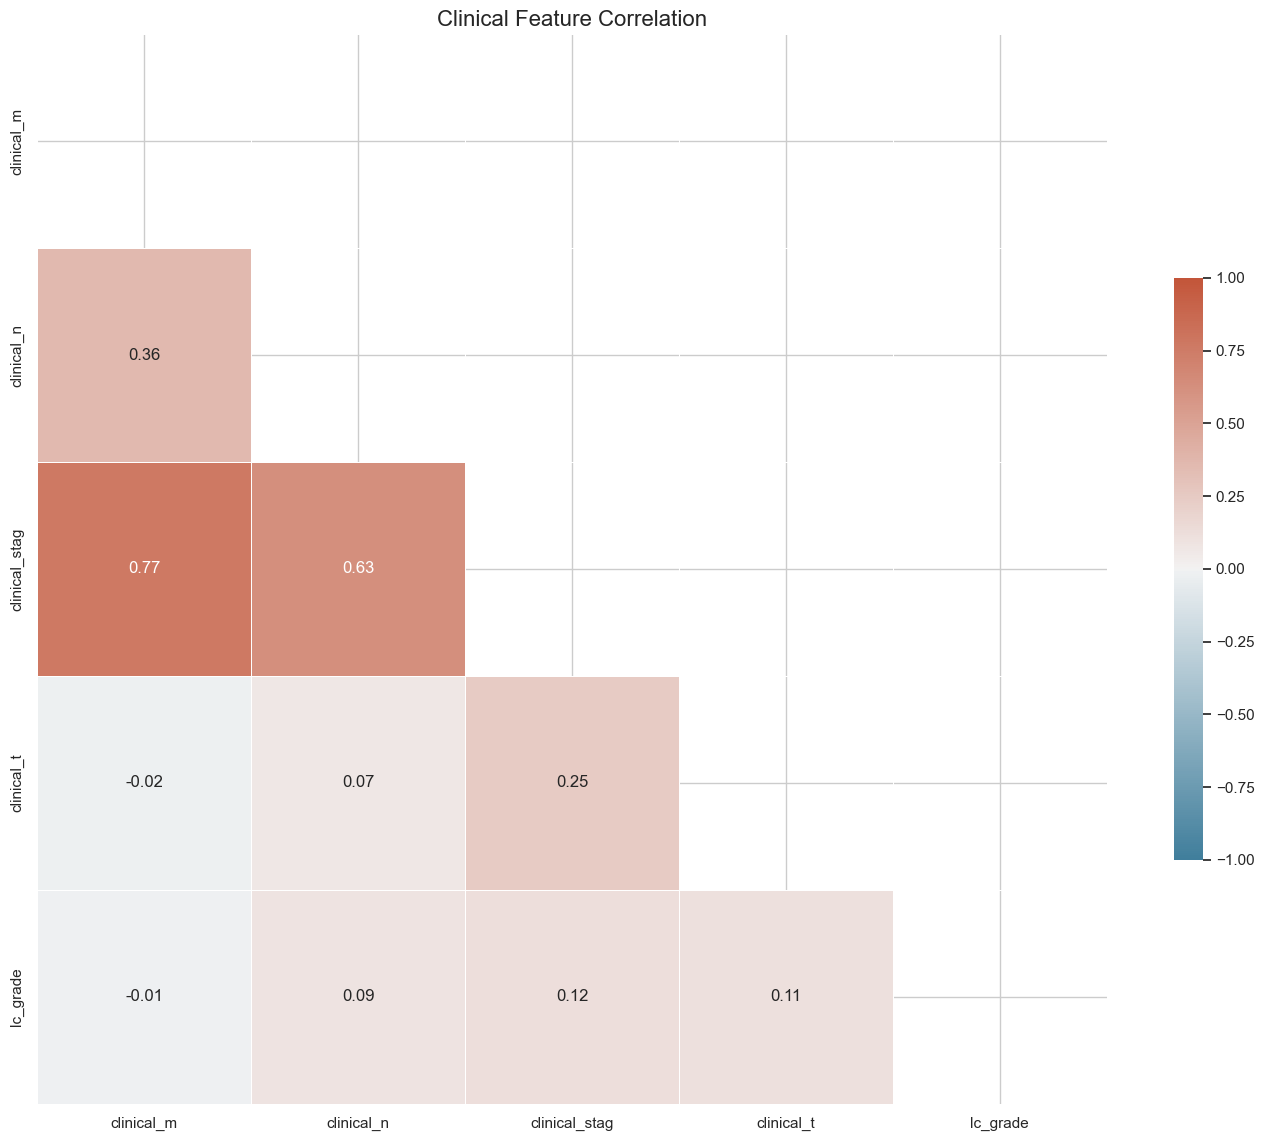

In [113]:
# Visualize feature correlation
# Select numeric columns for correlation analysis
numeric_cols = merged_df.select_dtypes(include=[np.number]).columns.tolist()
# Select a subset of important features
important_features = [col for col in numeric_cols if col in ['lc_grade', 'clinical_t', 'clinical_n', 'clinical_m', 'clinical_stag']][:10]
visualize_feature_correlation(merged_df, features=important_features,
                             title='Clinical Feature Correlation',
                             save_path='feature_correlation.png')

<Figure size 1400x800 with 0 Axes>

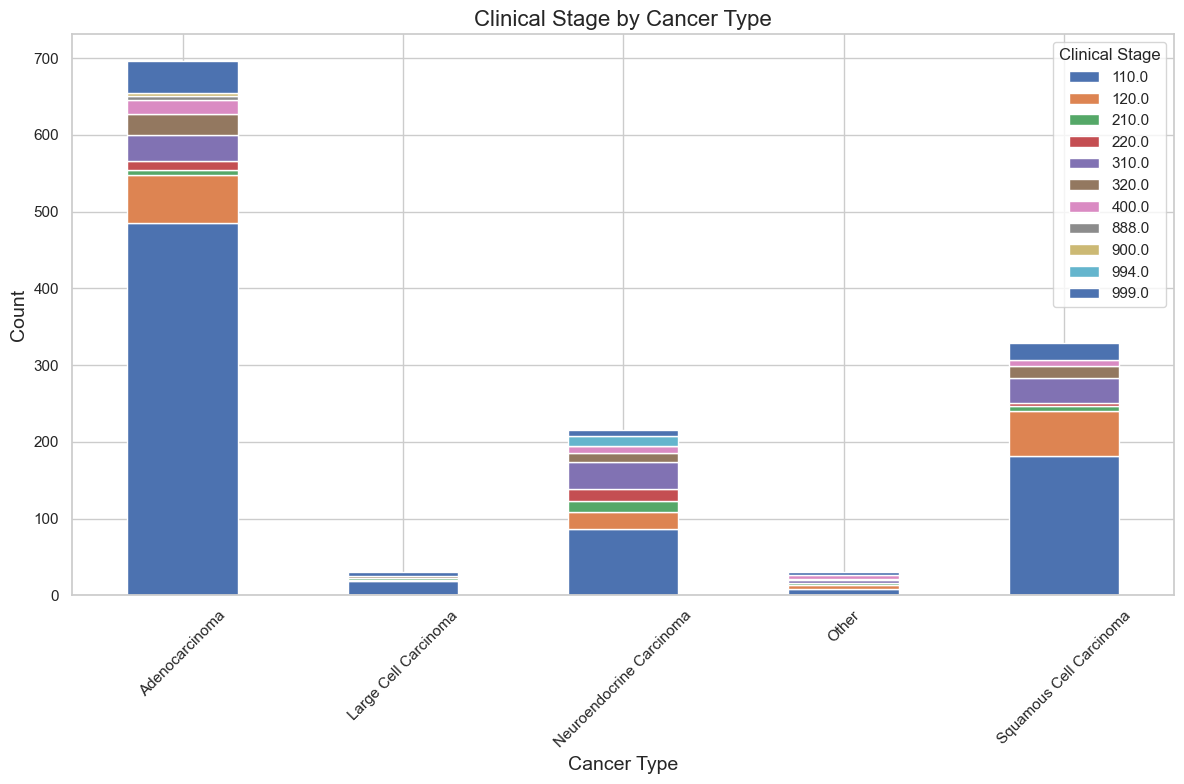

In [114]:
# Visualize clinical data by cancer type
# Create a grouped bar chart for clinical stage by cancer type
if 'clinical_stag' in merged_df.columns and 'major_category' in merged_df.columns:
    plt.figure(figsize=(14, 8))
    stage_counts = pd.crosstab(merged_df['major_category'], merged_df['clinical_stag'])
    stage_counts.plot(kind='bar', stacked=True)
    plt.title('Clinical Stage by Cancer Type', fontsize=16)
    plt.xlabel('Cancer Type', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title='Clinical Stage')
    plt.tight_layout()
    plt.savefig('stage_by_cancer_type.png')
    plt.show()

## 4. Lung Nodule Detection and SVS Image Visualization

In this section, we'll visualize the SVS (Aperio Slide Virtual Slide) files of lung biopsies and detect lung nodules, which are small masses of tissue in the lung that may be cancerous or benign. These nodules are key features for cancer type classification.

In [115]:
# Import SVS visualization module
from svs_visualization import (
    load_svs_slide, get_slide_info, visualize_slide_thumbnail,
    visualize_slide_region, visualize_slide_grid, detect_tissue_regions,
    visualize_tissue_detection, extract_tissue_tiles, visualize_extracted_tiles,
    visualize_magnification_levels, visualize_slide_with_annotations
)

In [116]:
# Set path to SVS files
svs_dir = "E:/cancer type/NLST_pathhe_batch3/batch3"

# Check if directory exists
if not os.path.exists(svs_dir):
    print(f"Error: SVS directory not found: {svs_dir}")
else:
    print(f"SVS directory found: {svs_dir}")
    
    # List SVS files
    svs_files = [f for f in os.listdir(svs_dir) if f.endswith('.svs')]
    print(f"Found {len(svs_files)} SVS files")
    
    # Display first few files
    if svs_files:
        print("\nFirst 5 SVS files:")
        for i, f in enumerate(svs_files[:5]):
            print(f"  {i+1}. {f}")

SVS directory found: E:/cancer type/NLST_pathhe_batch3/batch3
Found 135 SVS files

First 5 SVS files:
  1. 10120.svs
  2. 10121.svs
  3. 10122.svs
  4. 10132.svs
  5. 10133.svs


Selected sample SVS file: E:/cancer type/NLST_pathhe_batch3/batch3\10120.svs

Slide Information:
  Dimensions: (99857, 77310)
  Level Count: 4
  Level Dimensions: ((99857, 77310), (24964, 19327), (6241, 4831), (3120, 2415))
  Level Downsamples: (1.0, 4.0000717699291295, 16.00152909073355, 32.00893553909859)


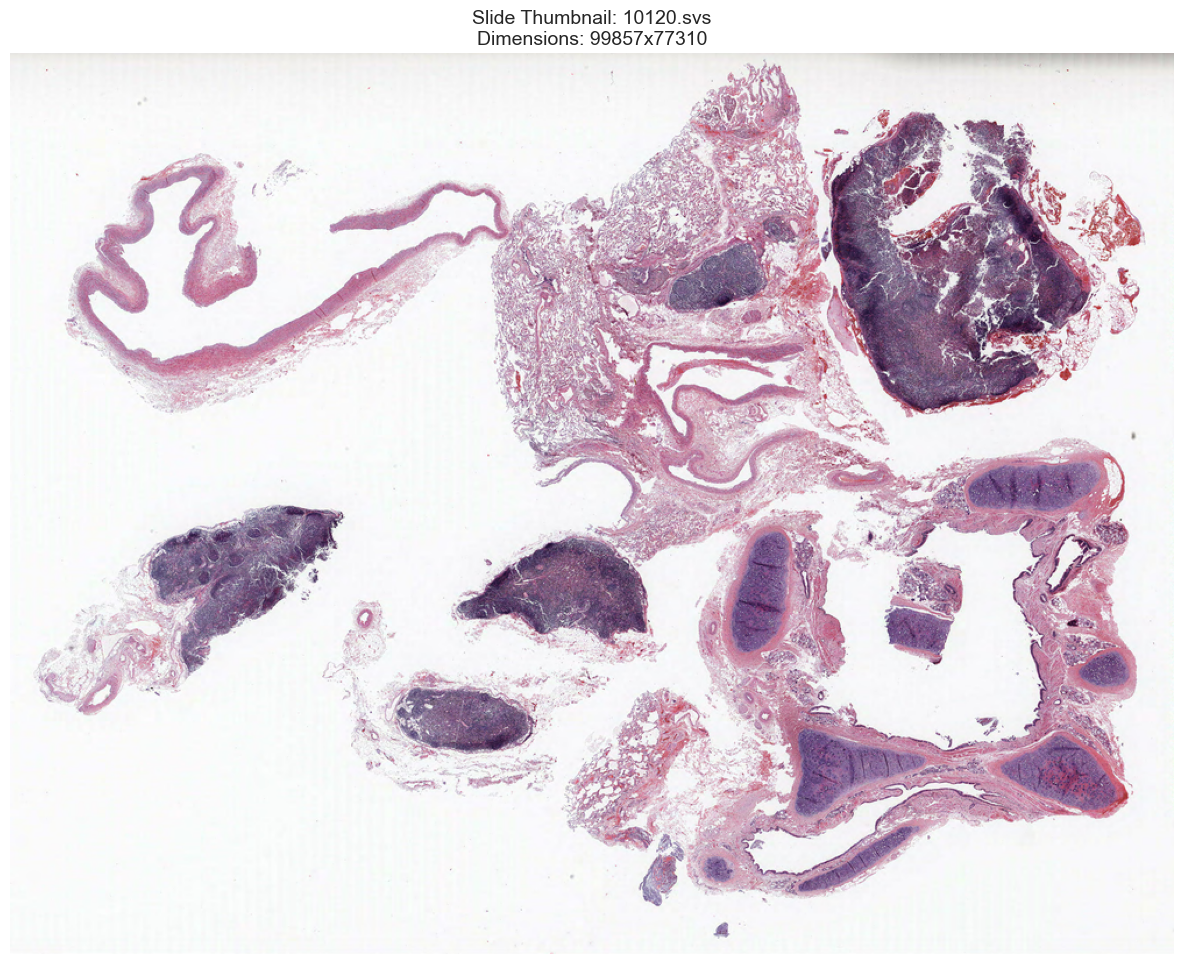

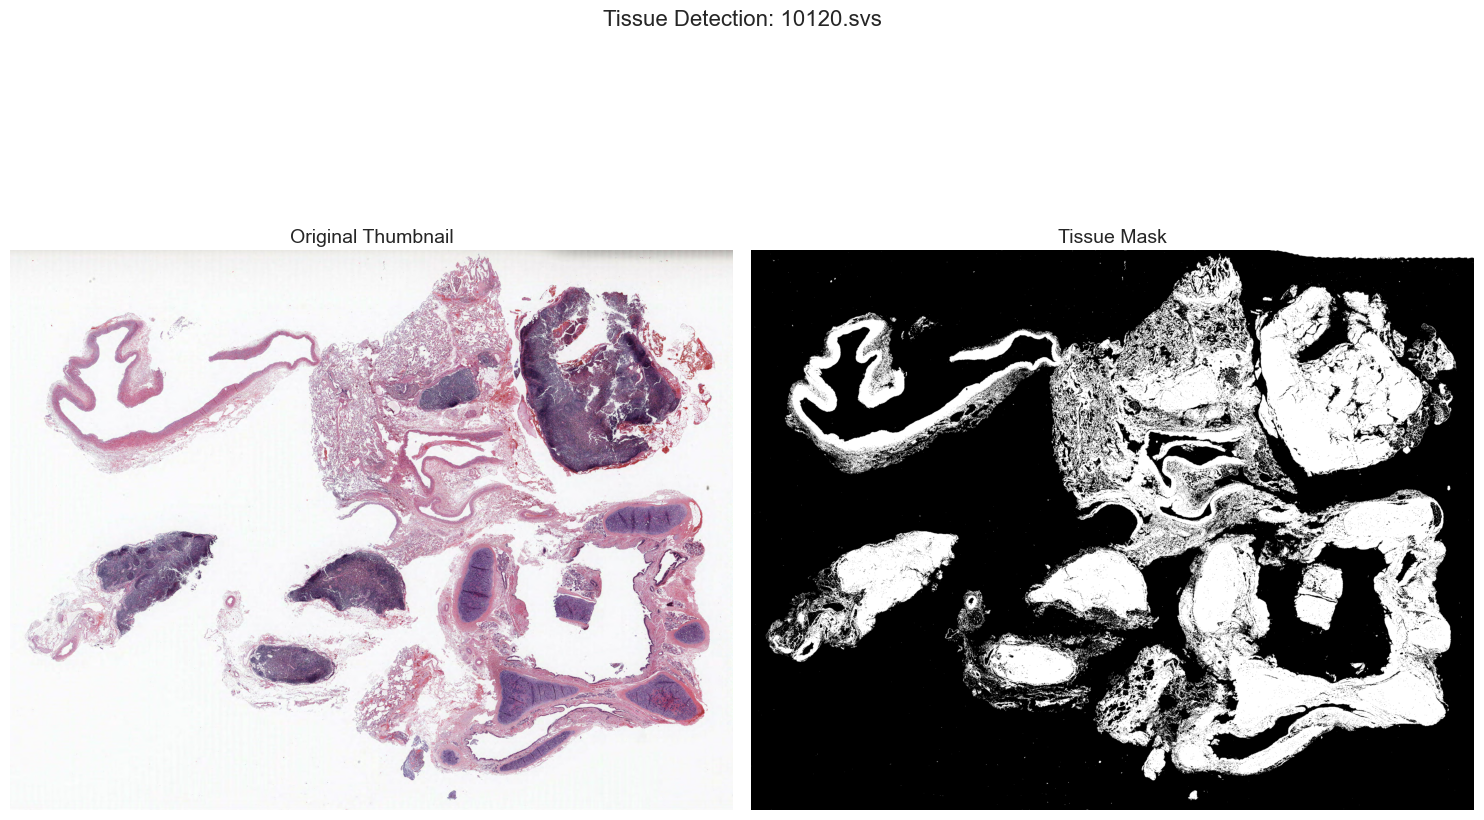

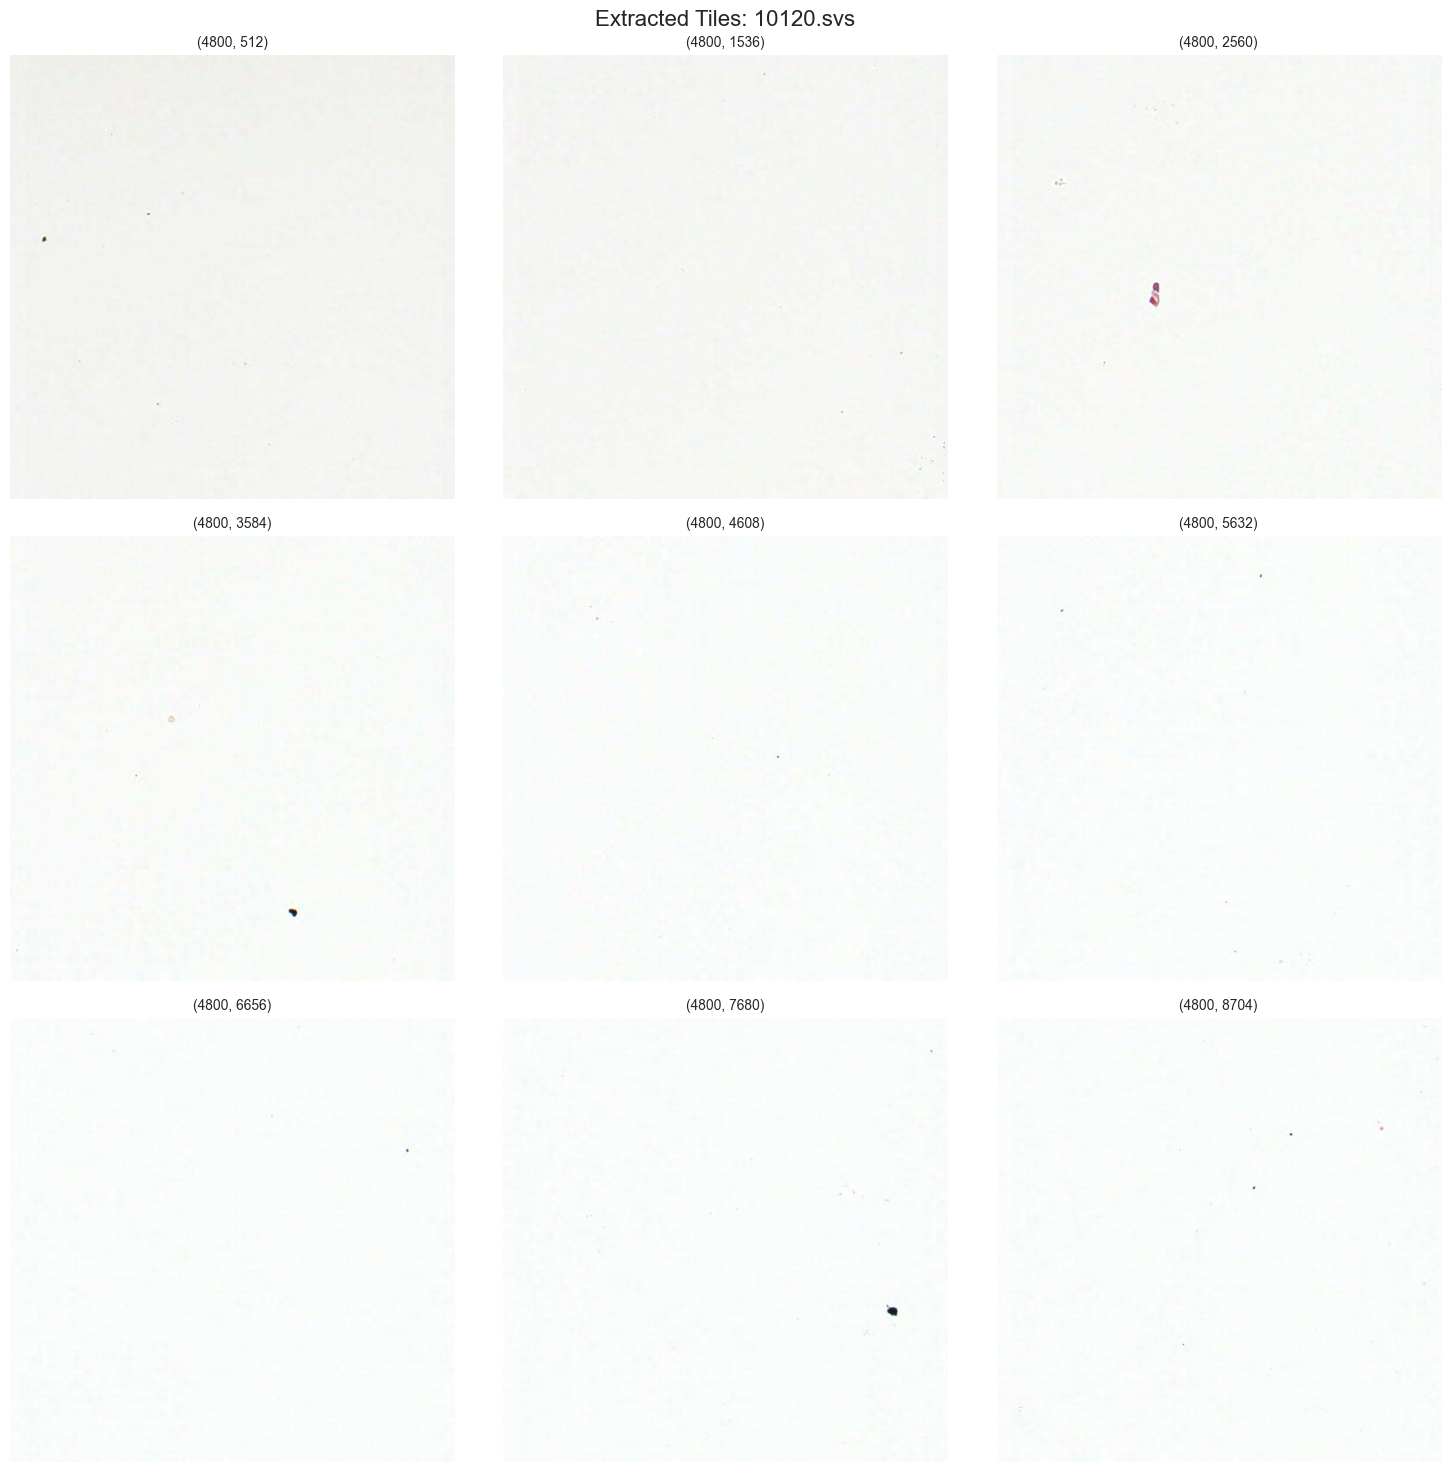

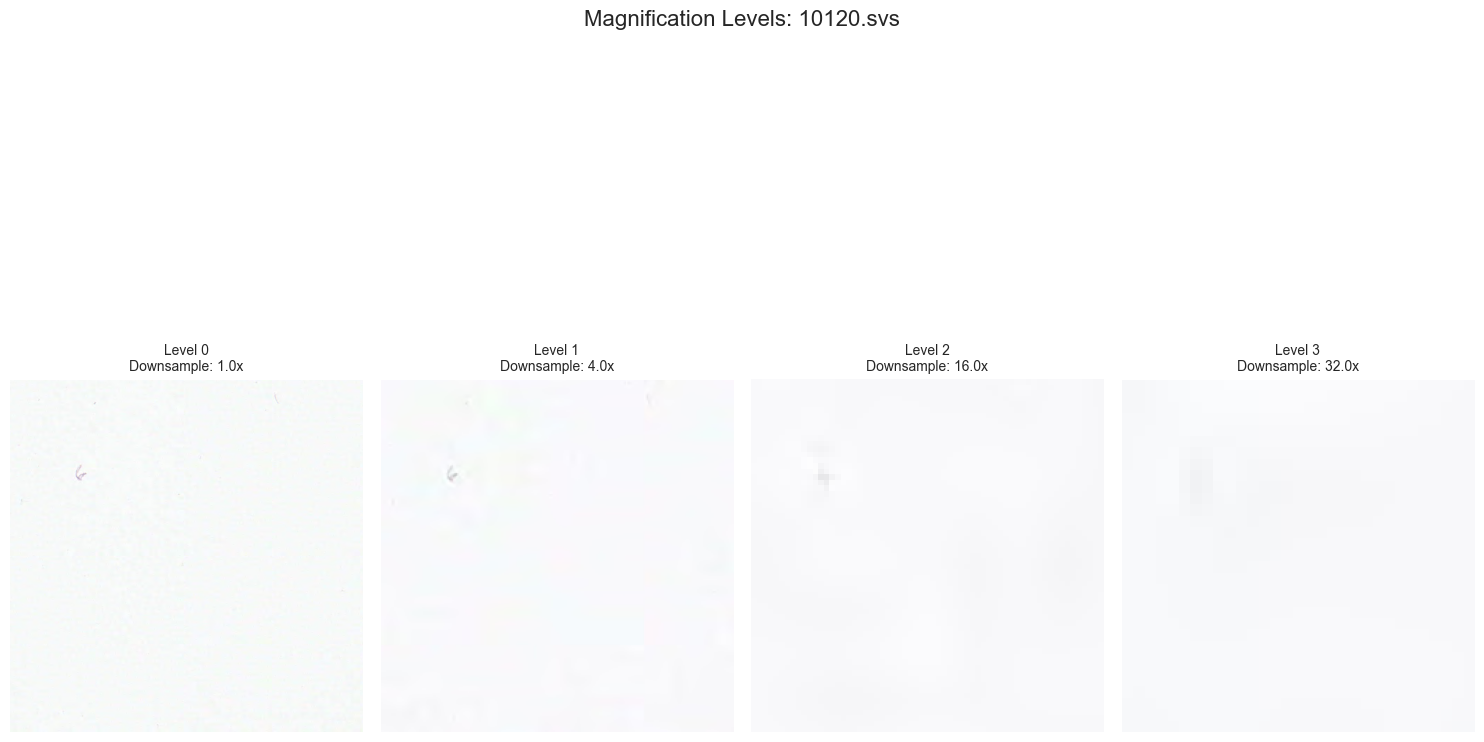

In [117]:
# Visualize a sample SVS file
if 'svs_files' in locals() and svs_files:
    # Select a sample SVS file
    sample_svs_path = os.path.join(svs_dir, svs_files[0])
    print(f"Selected sample SVS file: {sample_svs_path}")
    
    # Load slide
    slide = load_svs_slide(sample_svs_path)
    if slide is not None:
        # Get slide info
        info = get_slide_info(slide)
        
        # Display slide info
        print("\nSlide Information:")
        print(f"  Dimensions: {info['dimensions']}")
        print(f"  Level Count: {info['level_count']}")
        print(f"  Level Dimensions: {info['level_dimensions']}")
        print(f"  Level Downsamples: {info['level_downsamples']}")
        
        # Visualize slide thumbnail
        thumbnail = visualize_slide_thumbnail(slide, title=f"Slide Thumbnail: {os.path.basename(sample_svs_path)}", 
                                            figsize=(12, 12), save_path="slide_thumbnail.png")
        
        # Detect tissue regions
        tissue_mask, thumbnail, scale_factors = detect_tissue_regions(slide)
        
        # Visualize tissue detection
        visualize_tissue_detection(slide, tissue_mask, thumbnail, 
                                 title=f"Tissue Detection: {os.path.basename(sample_svs_path)}", 
                                 figsize=(15, 10), save_path="tissue_detection.png")
        
        # Extract tissue tiles
        tiles = extract_tissue_tiles(slide, tissue_mask, scale_factors, level=0, tile_size=1024, max_tiles=9)
        
        # Visualize extracted tiles
        visualize_extracted_tiles(tiles, grid_size=(3, 3), 
                                title=f"Extracted Tiles: {os.path.basename(sample_svs_path)}", 
                                figsize=(15, 15), save_path="extracted_tiles.png")
        
        # Visualize magnification levels
        visualize_magnification_levels(slide, title=f"Magnification Levels: {os.path.basename(sample_svs_path)}", 
                                     figsize=(15, 10), save_path="magnification_levels.png")
    else:
        print("Error: Could not load sample SVS file")
else:
    print("No SVS files found")

In [118]:
# Visualize slides by cancer type
if 'pathology' in locals() and 'major_category' in pathology.columns:
    # Get unique cancer types
    cancer_types = pathology['major_category'].dropna().unique()
    
    print(f"Found {len(cancer_types)} cancer types")
    
    # Create output directory
    output_dir = "cancer_type_visualizations"
    os.makedirs(output_dir, exist_ok=True)
    
    # Process each cancer type (limit to 2 for demonstration)
    for cancer_type in list(cancer_types)[:2]:
        # Get slides for this cancer type
        type_df = pathology[pathology['major_category'] == cancer_type]
        
        # Get list of image filenames
        if 'image_filename' in type_df.columns:
            type_files = type_df['image_filename'].tolist()
            
            # Filter to files that exist in the directory
            existing_files = [f for f in type_files if f in svs_files]
            
            # Select a sample (up to 2 slides)
            sample_files = existing_files[:2]
            
            if sample_files:
                print(f"\nProcessing {len(sample_files)} slides for cancer type: {cancer_type}")
                
                # Create cancer type directory
                type_dir = os.path.join(output_dir, str(cancer_type).replace(' ', '_'))
                os.makedirs(type_dir, exist_ok=True)
                
                # Process each slide
                for i, filename in enumerate(sample_files):
                    try:
                        # Load slide
                        slide_path = os.path.join(svs_dir, filename)
                        slide = load_svs_slide(slide_path)
                        
                        if slide is not None:
                            # Visualize slide thumbnail
                            visualize_slide_thumbnail(slide, 
                                                    title=f"{cancer_type}: {filename}", 
                                                    save_path=os.path.join(type_dir, f"thumbnail_{i+1}.png"))
                            
                            # Close slide
                            slide.close()
                    except Exception as e:
                        print(f"Error processing slide {filename}: {e}")
            else:
                print(f"No slides found for cancer type: {cancer_type}")
        else:
            print("'image_filename' column not found in pathology data")
    
    print(f"\nProcessed slides by cancer type. Visualizations saved to '{output_dir}' directory.")
else:
    print("Cannot group slides by cancer type: pathology data not available or 'major_category' column missing")

Cannot group slides by cancer type: pathology data not available or 'major_category' column missing


## 5. Data Preprocessing

In this section, we'll preprocess the pathology images for model training.

In [119]:
# Import data preprocessing module
from data_preprocessing import (
    create_directories, load_metadata, load_svs_slide,
    extract_roi, extract_tissue_regions, preprocess_image,
    apply_augmentation, process_slides, analyze_processed_data
)

In [120]:
# Create directories for processed images
create_directories()

All directories created successfully.


In [121]:
# Load metadata
metadata = load_metadata()
if metadata is None:
    print("Error: Could not load metadata. Exiting.")

Loading prepared modeling data...
Loaded metadata with 1351 entries


In [122]:
# Set image directory
image_dir = "E:/cancer type/NLST_pathhe_batch3/batch3"
if not os.path.exists(image_dir):
    print(f"Error: Image directory not found: {image_dir}")

In [123]:
import inspect
print(inspect.signature(process_slides))

(metadata, image_dir, output_dir='processed_images', max_slides=None, target_size=(512, 512), color_normalization=True, contrast_enhancement=True, augmentation_types=None, basic_augmentation_only=False)


In [124]:
import importlib
import data_preprocessing
importlib.reload(data_preprocessing)

<module 'data_preprocessing' from 'd:\\ESPRIT\\4DS\\pi\\PulmoScan\\cancer_type\\data_preprocessing.py'>

In [125]:
from data_preprocessing import process_slides

In [126]:
import inspect
print(inspect.signature(process_slides))


(metadata, image_dir, output_dir='processed_images', max_slides=None, target_size=(512, 512), color_normalization=True, contrast_enhancement=True, augmentation_types=None, basic_augmentation_only=False)


In [127]:
# Process slides (limit to 5 slides for testing)
# Note: This may take a long time to run
processed_df = process_slides(metadata, image_dir, max_slides=5,
                             target_size=(512, 512),
                             color_normalization=True,
                             contrast_enhancement=True)

Processing 5 slides...


  0%|          | 0/5 [00:00<?, ?it/s]

Slide not found: E:/cancer type/NLST_pathhe_batch3/batch3\11445.svs
Slide not found: E:/cancer type/NLST_pathhe_batch3/batch3\11446.svs
Slide not found: E:/cancer type/NLST_pathhe_batch3/batch3\11447.svs


100%|██████████| 5/5 [00:13<00:00,  2.65s/it]

Processed 220 images from 5 slides



Analyzing processed data:

Images per category:
category
Adenocarcinoma    220
Name: count, dtype: int64

Images per split:
split
train    187
val       22
test      11
Name: count, dtype: int64

Images per category and split:
split           test  train  val
category                        
Adenocarcinoma    11    187   22


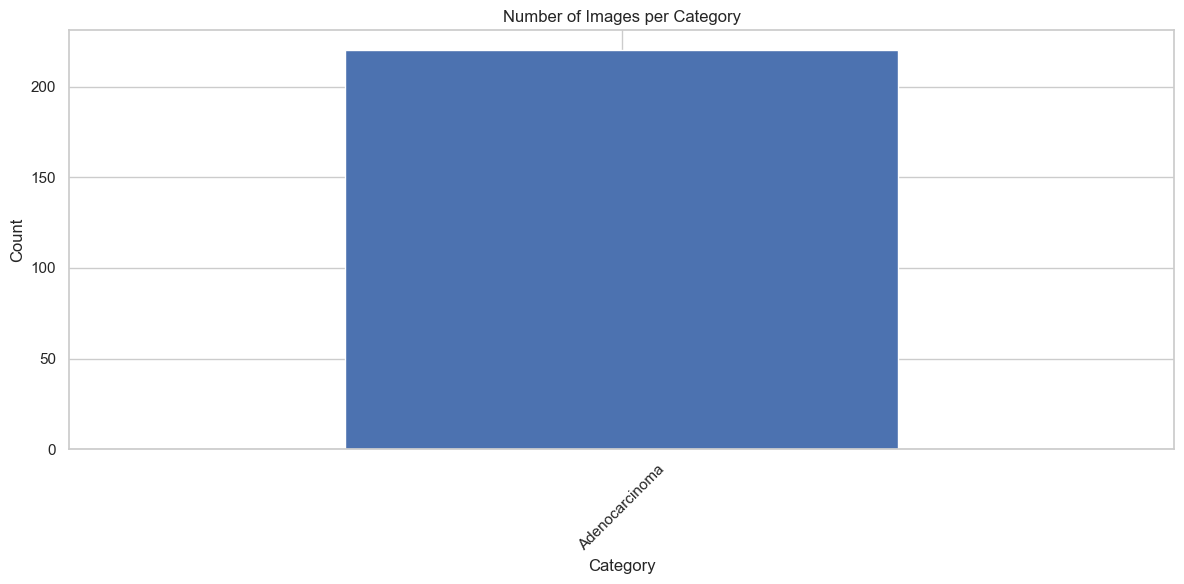

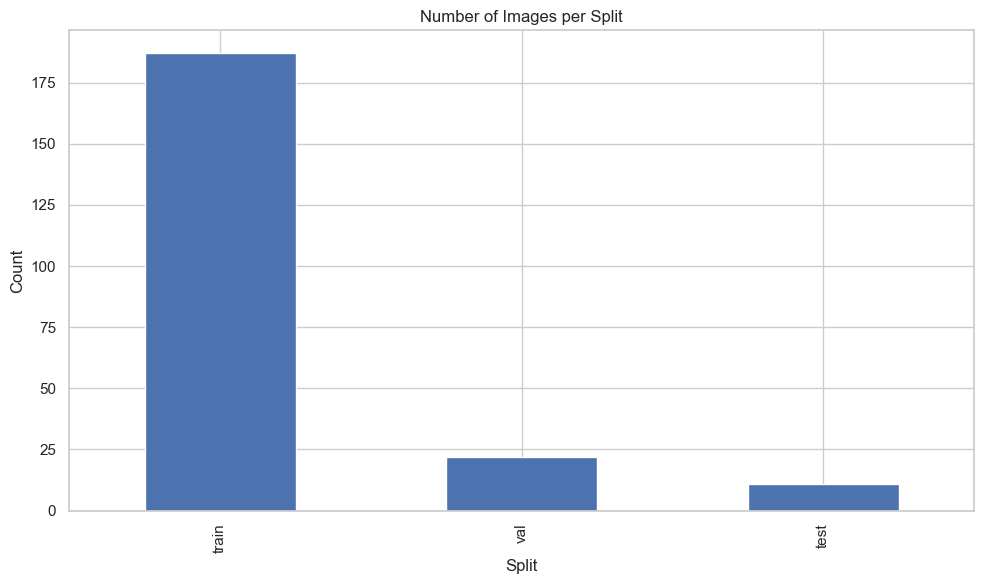

<Figure size 1400x800 with 0 Axes>

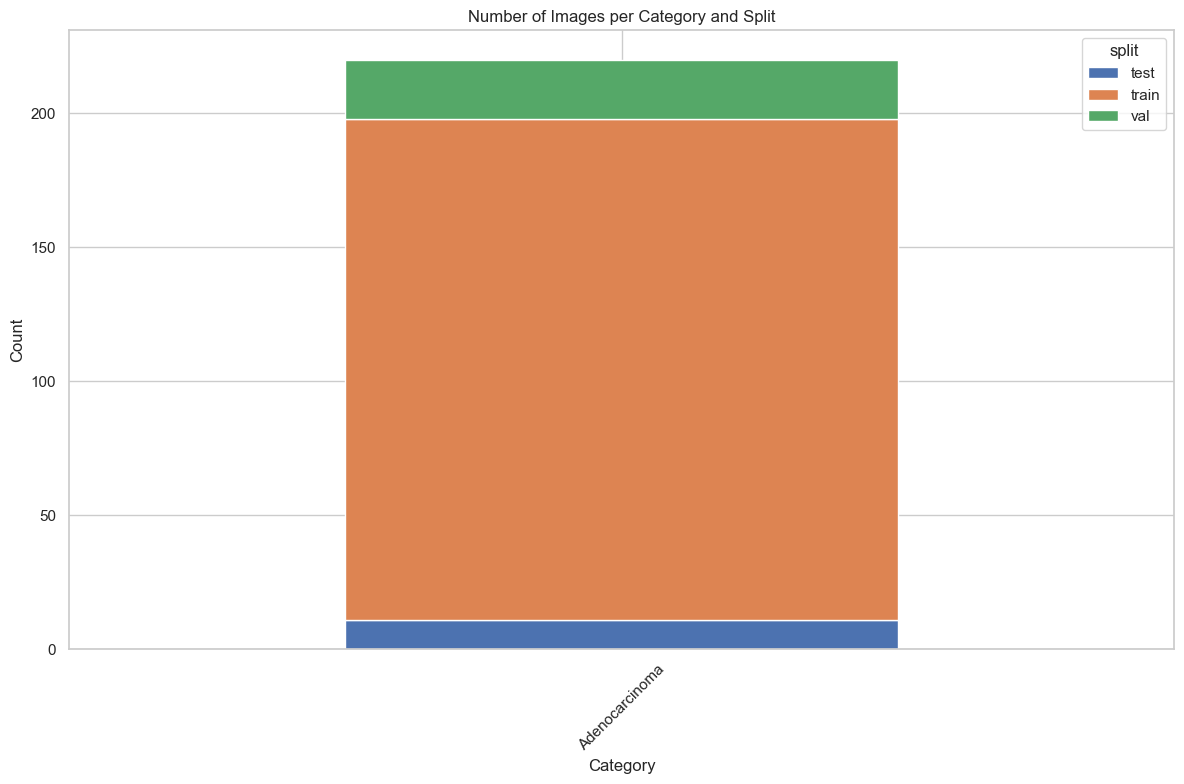

In [128]:
# Analyze processed data
analyze_processed_data(processed_df)

## 6. Advanced Visualization

In this section, we'll create more advanced visualizations of the processed data.

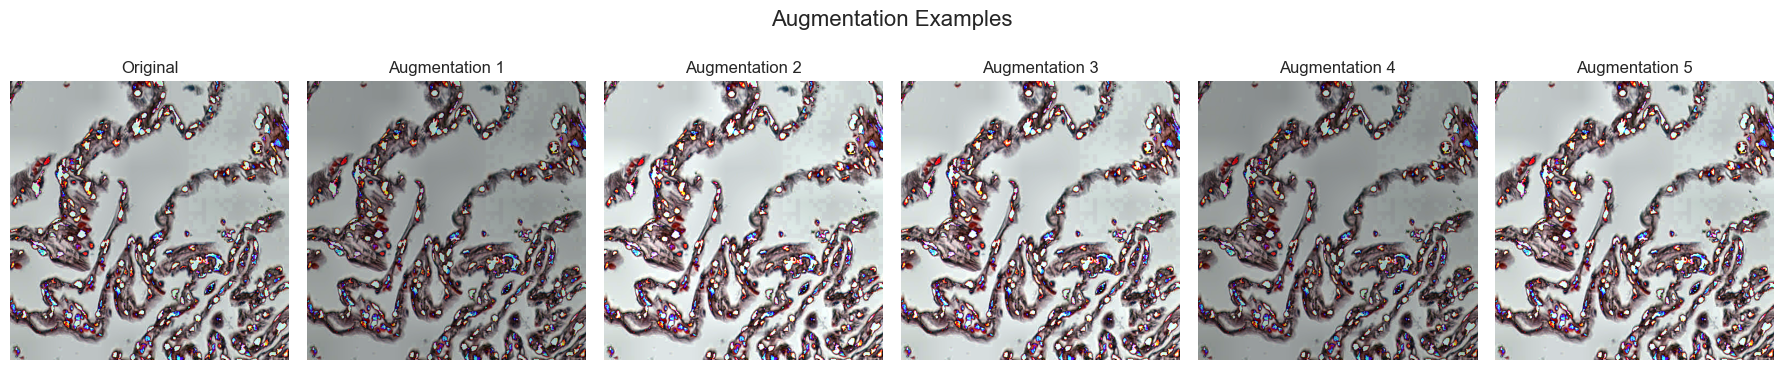

In [129]:
# Visualize augmentation examples
# Define a simple augmentation function for demonstration
def demo_augmentation(image):
    # Convert to numpy array
    img_array = np.array(image)
    
    # Apply random brightness adjustment
    brightness_factor = random.uniform(0.8, 1.2)
    img_array = np.clip(img_array * brightness_factor, 0, 255).astype(np.uint8)
    
    # Convert back to PIL Image
    return Image.fromarray(img_array)

# Find a sample image path from processed images (if available)
sample_image_path = None
try:
    import glob
    image_files = glob.glob('processed_images/train/*/*.png')
    if image_files:
        sample_image_path = image_files[0]
        visualize_augmentation_examples(sample_image_path, demo_augmentation, n_augmentations=5,
                                      title='Augmentation Examples', save_path='augmentation_examples.png')
    else:
        print("No processed images found. Process slides first to visualize augmentations.")
except Exception as e:
    print(f"Error visualizing augmentation examples: {e}")

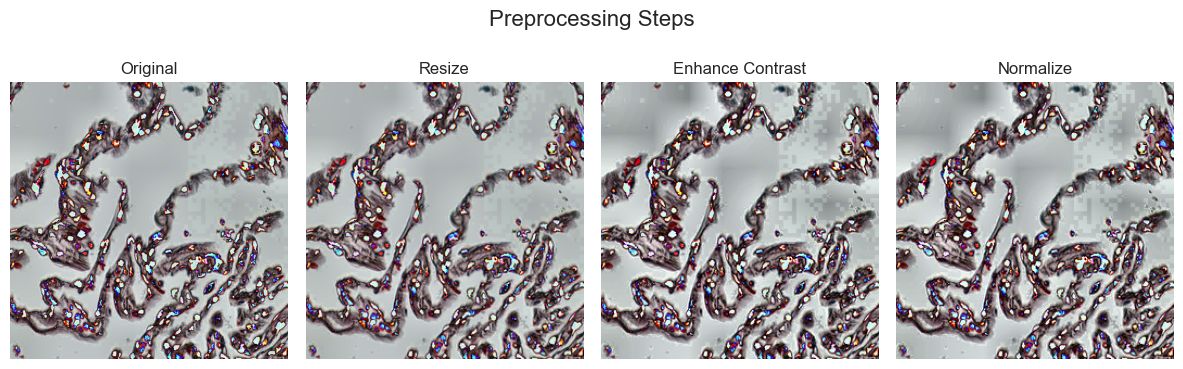

In [130]:
# Visualize preprocessing steps
# Define preprocessing functions for demonstration
def resize_image(image):
    return image.resize((256, 256), Image.LANCZOS)

def enhance_contrast(image):
    img_array = np.array(image)
    if len(img_array.shape) == 3:  # RGB image
        img_lab = cv2.cvtColor(img_array, cv2.COLOR_RGB2LAB)
        l_channel = img_lab[:, :, 0]
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        cl = clahe.apply(l_channel)
        img_lab[:, :, 0] = cl
        img_array = cv2.cvtColor(img_lab, cv2.COLOR_LAB2RGB)
    return Image.fromarray(img_array)

def normalize_image(image):
    img_array = np.array(image).astype(float) / 255.0
    return Image.fromarray((img_array * 255).astype(np.uint8))

# Find a sample image path
if sample_image_path:
    preprocessing_funcs = [resize_image, enhance_contrast, normalize_image]
    func_names = ['Resize', 'Enhance Contrast', 'Normalize']
    visualize_preprocessing_steps(sample_image_path, preprocessing_funcs, func_names,
                                title='Preprocessing Steps', save_path='preprocessing_steps.png')
else:
    print("No sample image available for preprocessing visualization.")

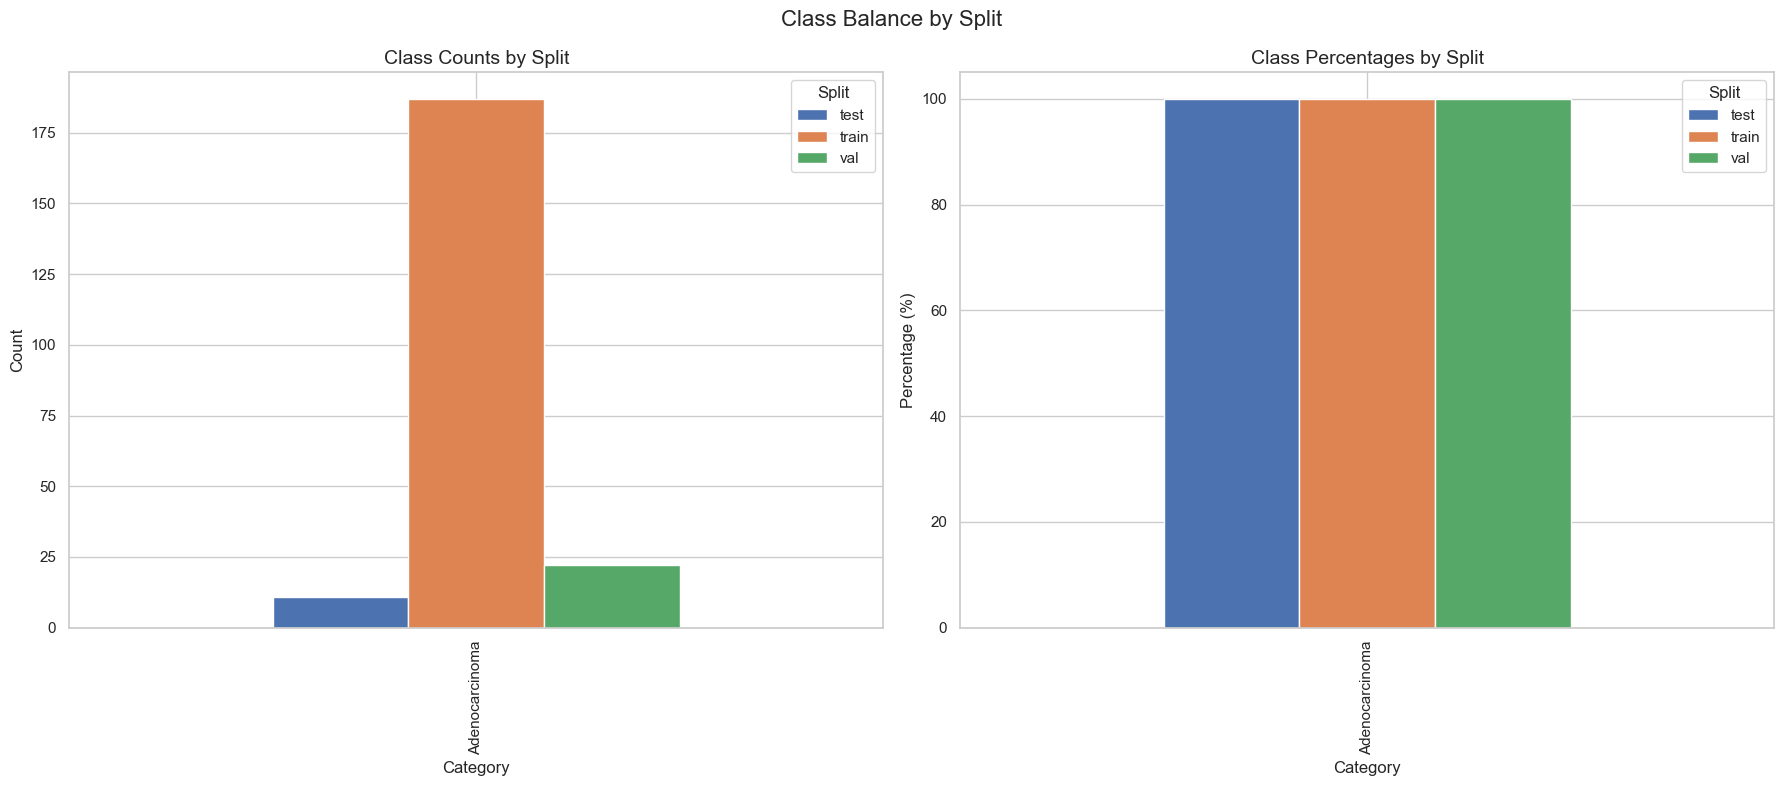

In [131]:
# Visualize class balance after processing (if processed data is available)
try:
    processed_data_path = 'processed_images/processed_data.csv'
    if os.path.exists(processed_data_path):
        processed_df = pd.read_csv(processed_data_path)
        visualize_class_balance(processed_df, category_col='category', split_col='split',
                              title='Class Balance by Split', save_path='class_balance.png')
    else:
        print("Processed data not found. Process slides first to visualize class balance.")
except Exception as e:
    print(f"Error visualizing class balance: {e}")

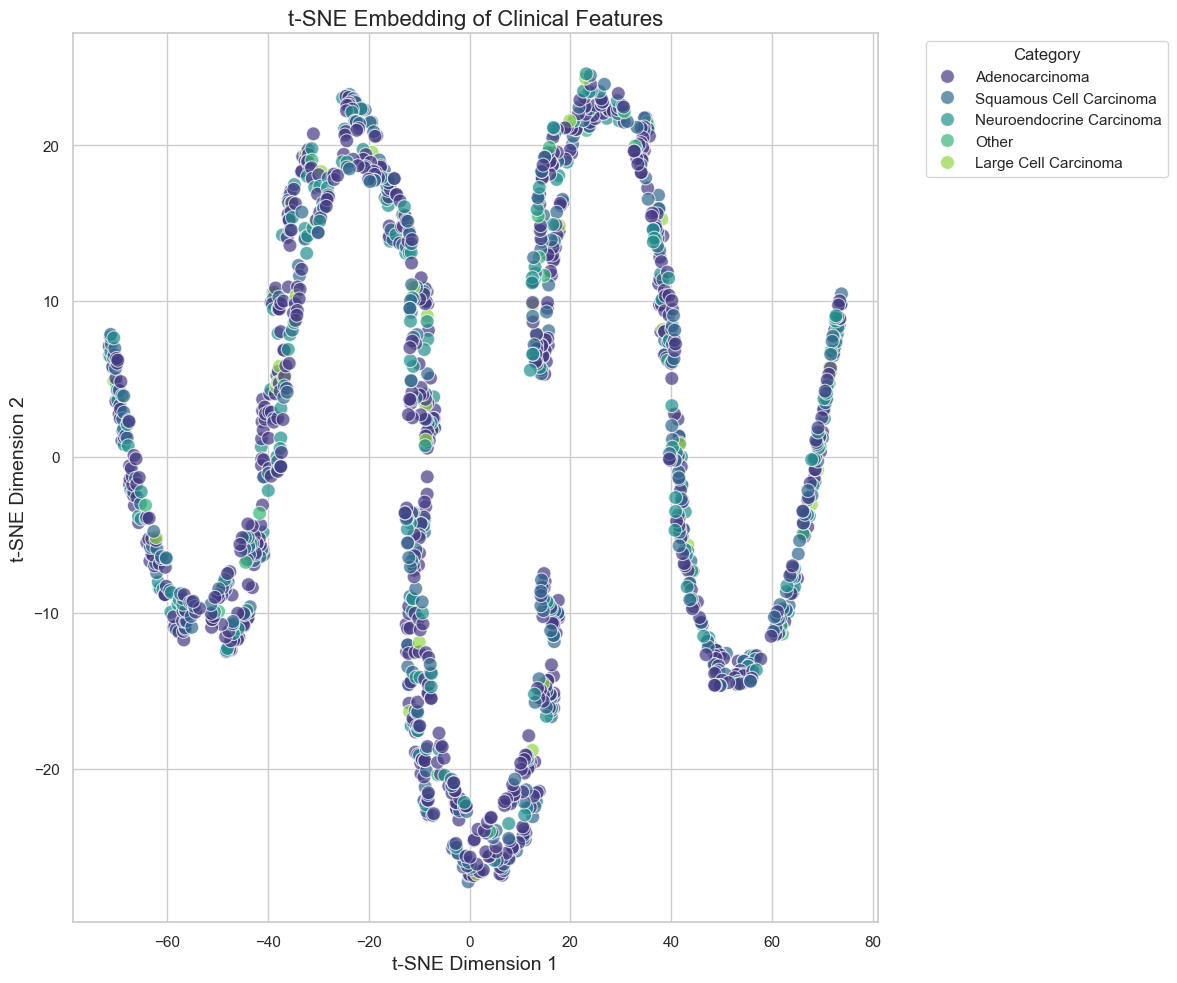

In [132]:
# Visualize t-SNE embedding of clinical features (if available)
try:
    # Select numeric features for t-SNE
    numeric_features = merged_df.select_dtypes(include=[np.number])
    # Remove columns with too many missing values
    valid_features = numeric_features.loc[:, numeric_features.isnull().mean() < 0.3]
    
    if not valid_features.empty and 'major_category' in merged_df.columns:
        # Fill remaining missing values with mean
        features_filled = valid_features.fillna(valid_features.mean())
        # Get labels
        labels = merged_df['major_category'].fillna('Unknown')
        
        # Visualize t-SNE embedding
        visualize_tsne_embedding(features_filled, labels, 
                               title='t-SNE Embedding of Clinical Features',
                               save_path='tsne_embedding.png')
    else:
        print("Not enough valid features for t-SNE visualization.")
except Exception as e:
    print(f"Error visualizing t-SNE embedding: {e}")

Analyzing images: 0it [00:00, ?it/s]


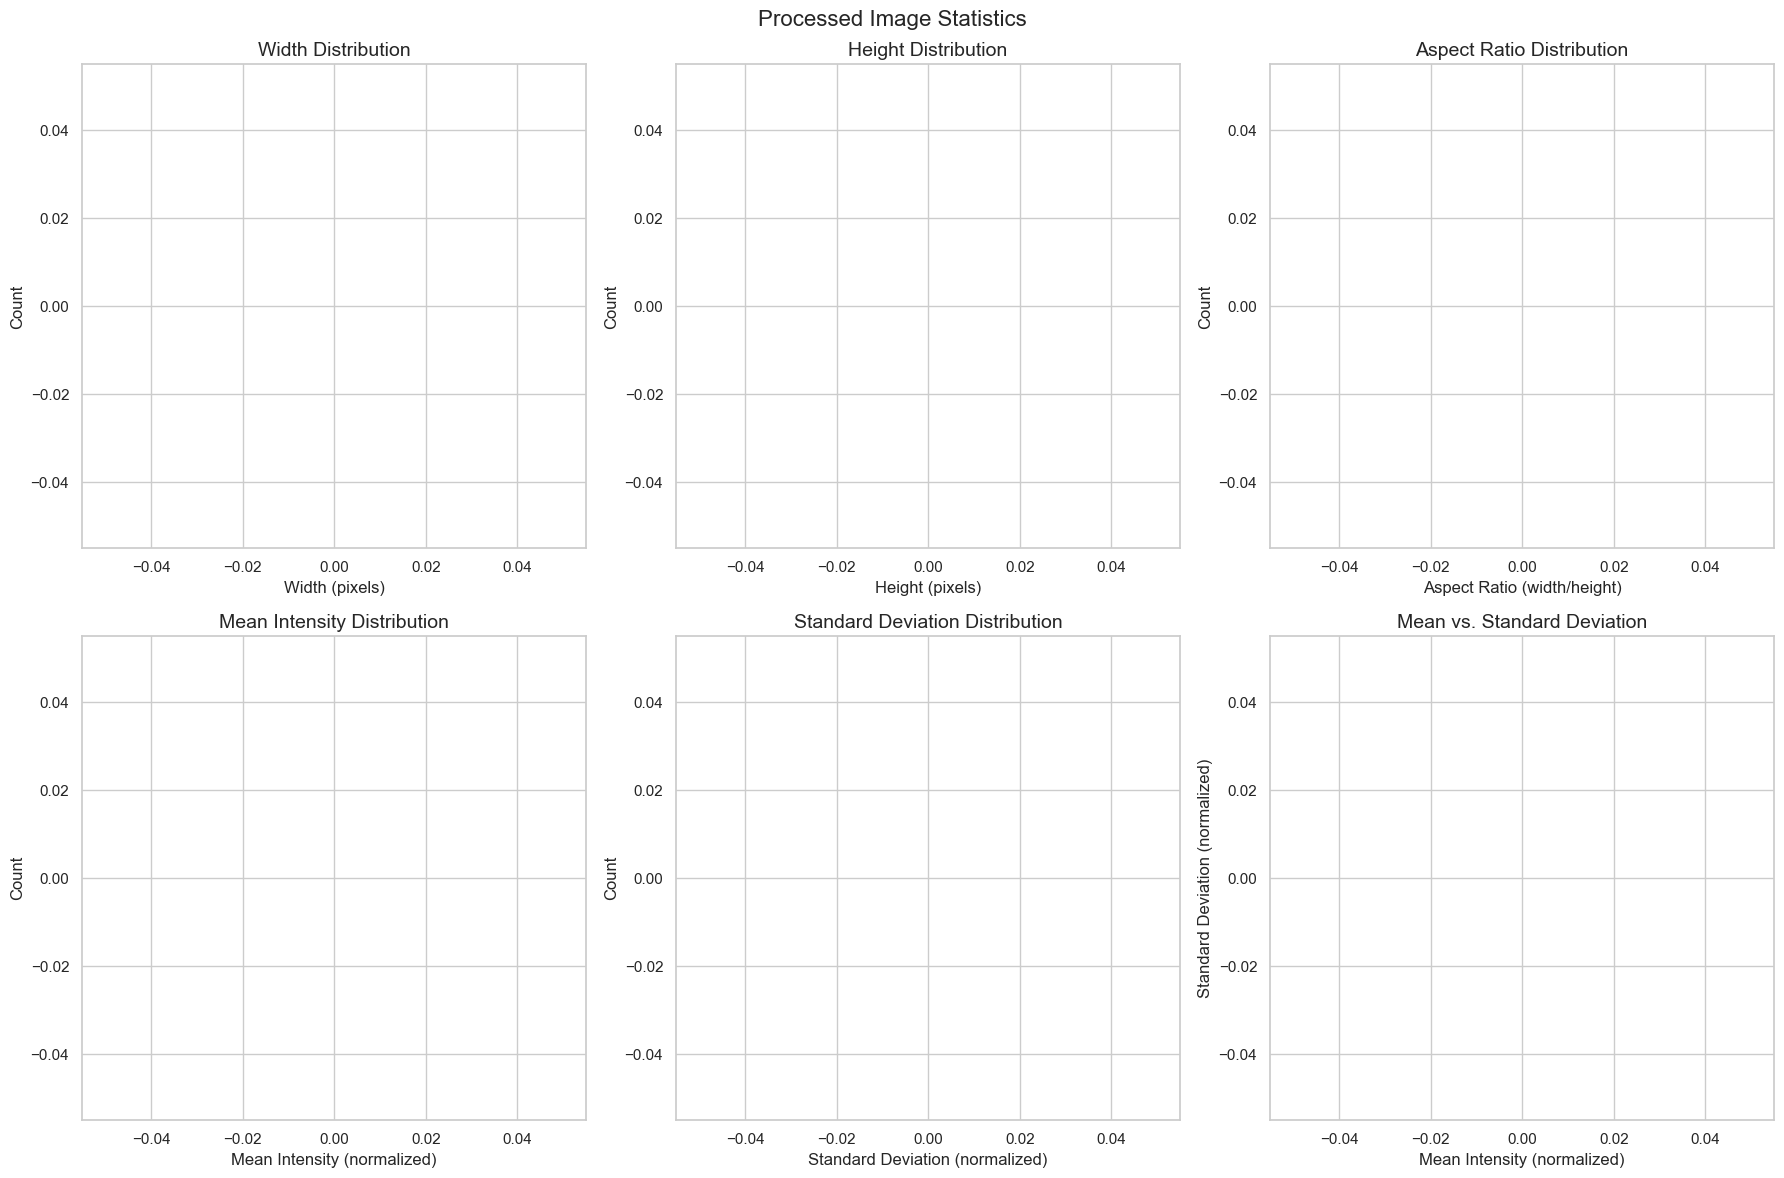

Error visualizing image statistics: zero-size array to reduction operation minimum which has no identity


In [133]:
# Visualize image statistics (if processed images are available)
try:
    if os.path.exists('processed_images'):
        visualize_image_statistics('processed_images', pattern='*/*.png', max_images=100,
                                 title='Processed Image Statistics', save_path='image_statistics.png')
    else:
        print("Processed images not found. Process slides first to visualize image statistics.")
except Exception as e:
    print(f"Error visualizing image statistics: {e}")

## 7. Balanced Data Augmentation

In this section, we'll apply balanced data augmentation to address class imbalance in the dataset.

In [134]:
# Import balanced augmentation module
from balanced_augmentation import (
    load_processed_data, analyze_class_distribution,
    apply_advanced_augmentation, create_balanced_dataset,
    analyze_balanced_dataset
)

In [135]:
# Load processed data
processed_df = load_processed_data()
if processed_df is None:
    print("Error: Could not load processed data. Exiting.")

Loaded processed data with 220 entries


In [136]:
# Analyze class distribution and determine augmentation factors
augmentation_factors = analyze_class_distribution(processed_df)


Training images per category:
category
Adenocarcinoma    187
Name: count, dtype: int64

Augmentation factors per category:
  Adenocarcinoma: 1x


In [137]:
# Create balanced dataset
# Note: This may take a long time to run
balanced_df = create_balanced_dataset(processed_df, augmentation_factors)

Created directory: balanced_images

Processing train split...


Processing Adenocarcinoma: 100%|██████████| 187/187 [00:07<00:00, 24.70it/s]



Processing val split...


Processing Adenocarcinoma: 100%|██████████| 22/22 [00:00<00:00, 31.73it/s]



Processing test split...


Processing Adenocarcinoma: 100%|██████████| 11/11 [00:00<00:00, 14.20it/s]



Created balanced dataset with 220 images



Analyzing balanced dataset:

Images per category:
category
Adenocarcinoma    220
Name: count, dtype: int64

Images per split:
split
train    187
val       22
test      11
Name: count, dtype: int64

Images per category and split:
split           test  train  val
category                        
Adenocarcinoma    11    187   22

Comparison of original and balanced training sets:
                Original  Balanced
category                          
Adenocarcinoma       187       187


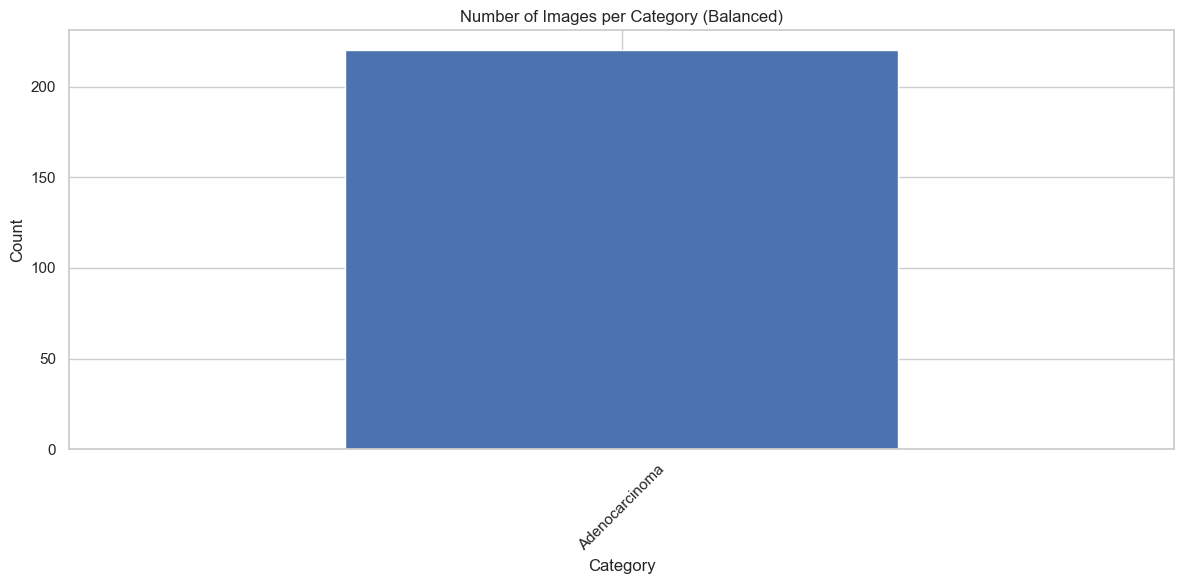

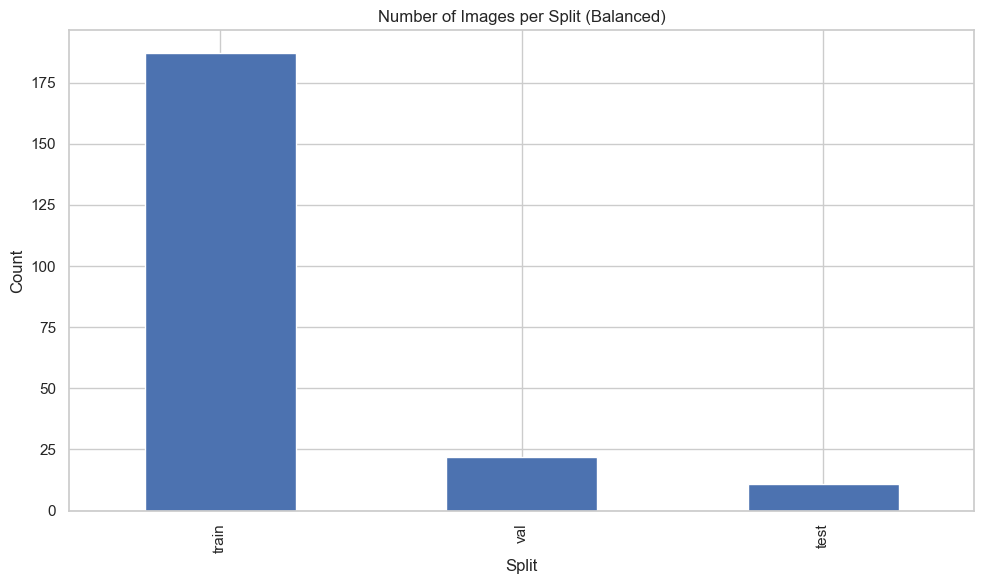

<Figure size 1400x800 with 0 Axes>

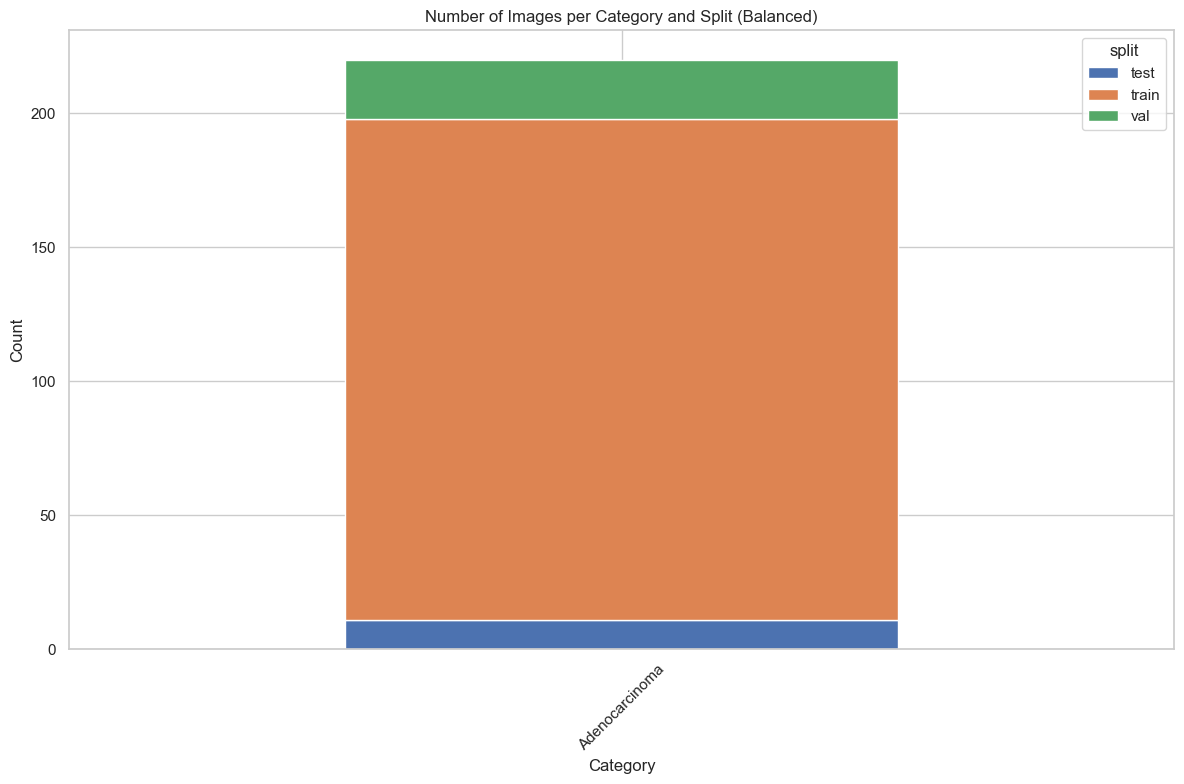

<Figure size 1400x800 with 0 Axes>

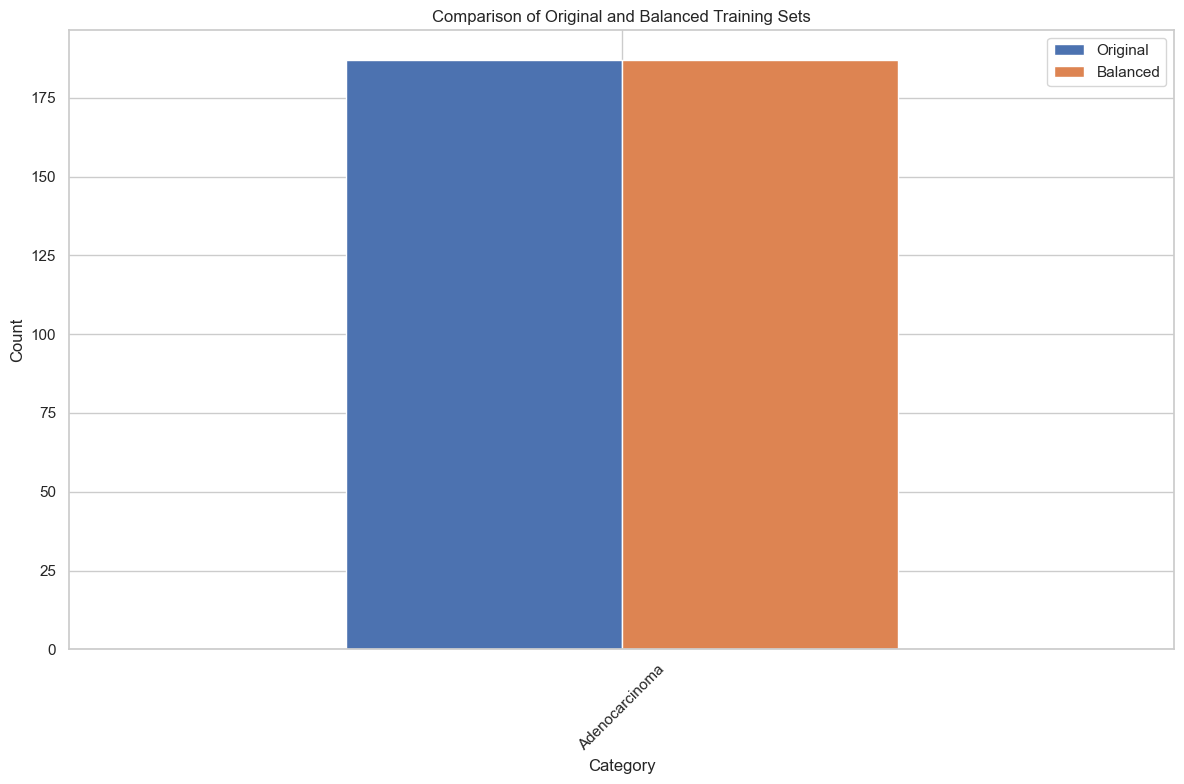

In [138]:
# Analyze balanced dataset
analyze_balanced_dataset(balanced_df)

## 7. Conclusion

In this notebook, we've performed comprehensive data understanding, preprocessing, and visualization for the cancer type classification task. The key steps included:

1. **Data Understanding**:
   - Loaded and explored clinical and pathology datasets
   - Analyzed cancer types and their distribution
   - Examined histology subtypes and clinical data

2. **Data Preprocessing**:
   - Created a pipeline for processing SVS files
   - Extracted regions of interest from pathology slides
   - Applied advanced preprocessing techniques including color normalization and contrast enhancement
   - Split data into train/val/test sets

3. **Data Visualization**:
   - Visualized cancer type distributions and clinical correlations
   - Demonstrated preprocessing steps and augmentation techniques
   - Created advanced visualizations like t-SNE embeddings and class balance analysis

4. **Balanced Data Augmentation**:
   - Analyzed class distribution
   - Applied advanced augmentation techniques
   - Created a balanced dataset for model training

The preprocessed, visualized, and balanced dataset is now ready for model training. The visualizations provide valuable insights into the data characteristics and preprocessing effects, which will help in designing an effective model architecture and training strategy.